In [2]:
import os
import numpy as np

from sklearn.metrics import r2_score

import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

from matplotlib import pyplot as plt

In [3]:
base_path = '/datacommons/carlsonlab/fcw/planet_preprocessed'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

In [4]:
from joblib import load

In [5]:
class OneHotImages(Dataset):
    def __init__(self, file_path):
        self.file_path = file_path
        
        # Images
        self.files = os.listdir(os.path.join(file_path, 'img'))
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        
        img = torch.load(os.path.join(self.file_path, 'img', self.files[idx]))
        
        with open(os.path.join(self.file_path, 'labels', self.files[idx][:-3] + '.txt')) as fp:
            label = float(fp.read())
            
        return img, label

In [6]:
def _kmeans_transform(img, kmeans_model):
    # Convert the image to a numpy array
    img_np = np.array(img)

    # Flatten the image to a 1D array
    img_flat = img_np.reshape((-1, 3))

    # Apply k-means clustering to the flattened image
    labels = kmeans_model.predict(img_flat)

    # Reshape the labels to match the original image shape
    img_labels = labels.reshape(img_np.shape[:2])

    # Convert the labels to a PyTorch tensor and return it
    return torch.tensor(img_labels, dtype=torch.long)

In [7]:
train_dataset = OneHotImages('/datacommons/carlsonlab/zdc6/cs590/land_use/train')
test_dataset = OneHotImages('/datacommons/carlsonlab/zdc6/cs590/land_use/test')

### See what images look like

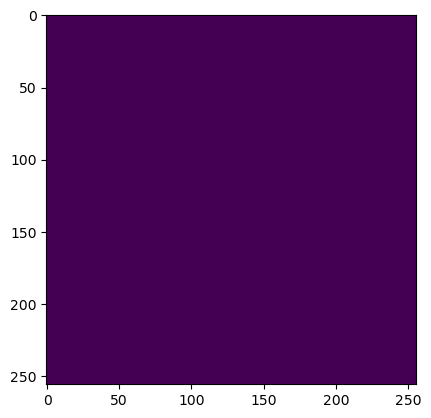

In [58]:
# Load the first image in the dataset
img, label = train_dataset[0]

# Convert the image to a numpy array
img_np = img.numpy()

# Plot the image
plt.imshow(img_np)
plt.show()

In [59]:
img_np

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]])

In [ ]:
# Torch packages
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.nn import functional as F